In [ ]:
import cv2
import numpy as np
from tqdm import tqdm
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image

In [ ]:
!gdown 1nDojB_02RG7TXdcTAiPjh6Ig-VhoUpt_

Downloading...
From: https://drive.google.com/uc?id=1nDojB_02RG7TXdcTAiPjh6Ig-VhoUpt_
To: /content/video.mp4
100% 3.80M/3.80M [00:00<00:00, 30.4MB/s]


In [ ]:
model = ResNet50(weights="imagenet", include_top=False, pooling="avg")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
video_path = "video.mp4"
target_size = (224, 224)

## Lectura del video

In [ ]:
cap = cv2.VideoCapture(video_path)
frames = []

In [ ]:
while True:
  ret, frame = cap.read()
  if not ret:
      break
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  frames.append(frame)
cap.release()
print("Fotogramas extraídos:", len(frames))

## Extracción de características

In [ ]:
features = []

for frm in tqdm(frames):
  img = cv2.resize(frm, target_size)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  feat = model.predict(x, verbose=0).ravel()
  features.append(feat)

features = np.array(features)
print("Shape de features:", features.shape)

## Distancia del coseno

In [ ]:
def cos_dist(im1, im2):
  return 1 - np.dot(im1, im2) / (np.linalg.norm(im1) * np.linalg.norm(im2))

In [ ]:
distances = []

In [ ]:
for i in range(len(features) - 1):
  distances.append(cos_dist(features[i], features[i+1]))
distances = np.array(distances)

## Histograma

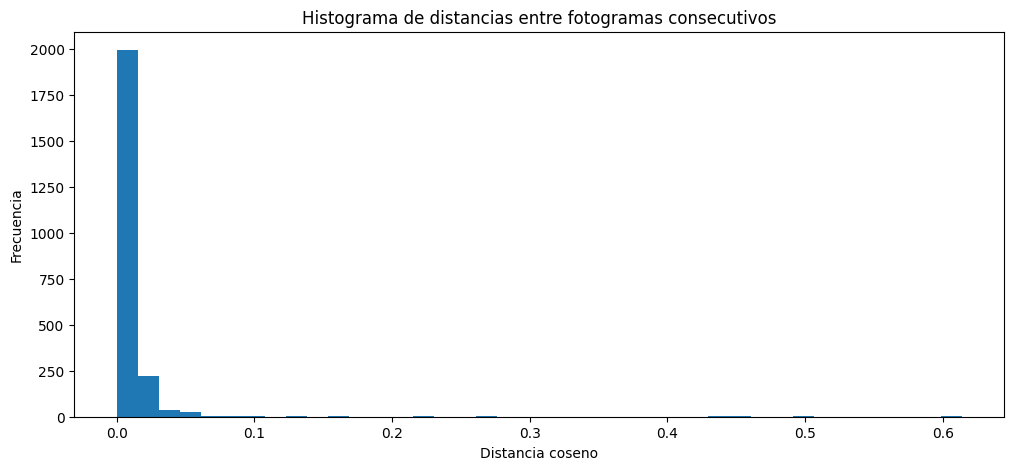

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,5))
plt.hist(distances, bins=40)
plt.title("Histograma de distancias entre fotogramas consecutivos")
plt.xlabel("Distancia coseno")
plt.ylabel("Frecuencia")
plt.show()

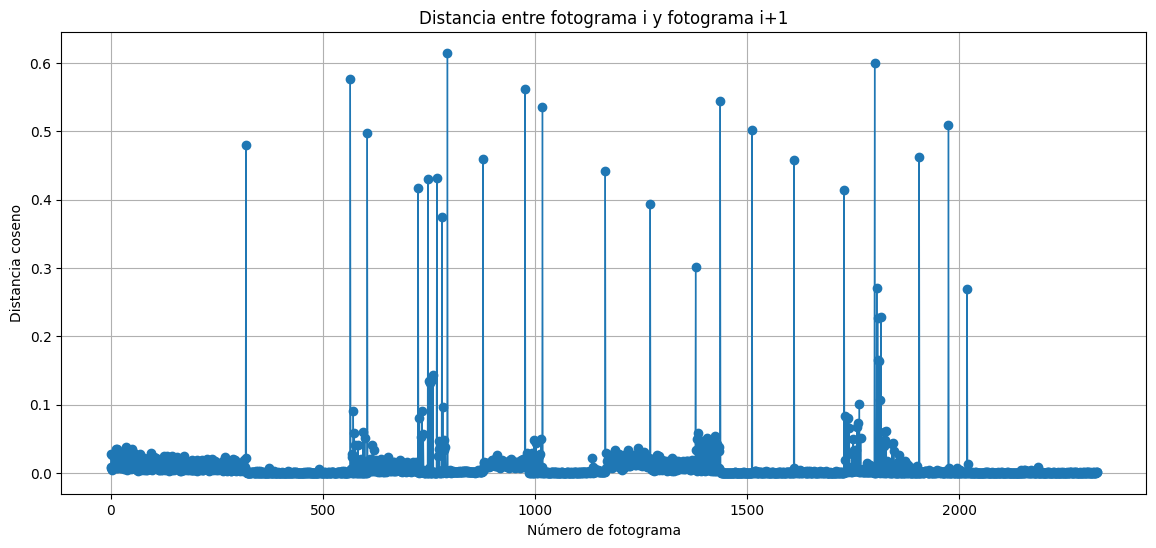

In [ ]:
plt.figure(figsize=(14,6))

plt.plot(range(len(distances)), distances, marker='o', linewidth=1)
plt.title("Distancia entre fotograma i y fotograma i+1")
plt.xlabel("Número de fotograma")
plt.ylabel("Distancia coseno")
plt.grid(True)

plt.show()

## Cantidad de escenas

In [ ]:
#umbral = distances.mean() + 2 * distances.std()
umbral = 0.2
escenas = np.where(distances > umbral)[0]

print("Umbral:", umbral)
print("Escenas detectadas:", len(escenas) + 1)

## Generar el GIF

In [ ]:
from PIL import Image
keyframes = [0] + (escenas + 1).tolist()
print("Fotogramas que representan cada escena:", keyframes)

imagenes_gif = []

for idx in keyframes:
  frm = frames[idx]
  img = Image.fromarray(frm)
  img = img.resize((300, 300))
  imagenes_gif.append(img)

gif_path = "escenas.gif"

imagenes_gif[0].save(
  gif_path,
  save_all=True,
  append_images=imagenes_gif[1:],
  duration=800,
  loop=0
)

gif_path

In [ ]:
from IPython.display import Image

Image(filename="escenas.gif")